In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [187]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

Perform API Calls

In [188]:
#Make a request for each of the cities
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

import json

responses = []

for x in range(len(cities)):
    print(f"Processing Record {x} of Set 1 | {cities[x]}")
    
    response = requests.get(query_url + cities[x])
    responses.append(response.json())

Processing Record 0 of Set 1 | sentyabrskiy
Processing Record 1 of Set 1 | mareeba
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | booue
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | moanda
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | narasannapeta
Processing Record 15 of Set 1 | hsilo
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | padang
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | alofi
Processing Record 24 of Set 1 

In [189]:
#Extract city weather data from responses list
max_temps = []
cities2 = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in responses:
    try:
        cities2.append(city['name'])
        max_temps.append(city['main']['temp_max'])
        lat.append(city['coord']['lat'])
        lon.append(city['coord']['lon'])
        humidity.append(city['main']['humidity'])
        cloudiness.append(city['clouds']['all'])
        wind_speed.append(city['wind']['speed'])
        country.append(city['sys']['country'])
        date.append(city['dt'])
    except: 
        continue


In [190]:
#Change max_temps to farenheit
temps_f = []
for i in max_temps:
    f = ((i - 273.15) * (9/5)) + (32)
    temps_f.append(f)

In [191]:
#Create new dataframe with extracted data
cities_df = pd.DataFrame({
    "City": cities2,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temps_f,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})


In [192]:
#Save df as csv
cities_df.to_csv(output_data_file, index=False)

#Display df
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mareeba,-17.0000,145.4333,87.800,66,75,3.09,AU,1610243809
1,Albany,42.6001,-73.9662,26.996,59,100,3.44,US,1610243707
2,Atuona,-9.8000,-139.0333,78.260,77,69,7.02,PF,1610243809
3,Hermanus,-34.4187,19.2345,62.996,93,100,5.55,ZA,1610243280
4,Saskylakh,71.9167,114.0833,-26.176,84,100,4.11,RU,1610243809
...,...,...,...,...,...,...,...,...,...
557,Marakkanam,12.2000,79.9500,76.838,87,44,4.52,IN,1610243881
558,Umeå,63.8284,20.2597,30.200,69,90,6.17,SE,1610243881
559,Luau,-10.7073,22.2247,62.312,99,82,1.45,AO,1610243881
560,Agadez,19.7500,10.2500,65.354,26,0,2.11,NE,1610243881


In [193]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.644084,20.115193,49.502822,74.811388,55.418149,3.598238,1.610244e+09
std,32.558772,92.613158,31.657194,17.899104,40.821352,2.561871,9.066414e+01
min,-54.800000,-179.166700,-33.718000,15.000000,0.000000,0.130000,1.610243e+09
25%,-6.872475,-60.409725,28.400000,66.250000,9.000000,1.540000,1.610244e+09
50%,22.196800,25.328300,60.899000,79.000000,75.000000,2.980000,1.610244e+09
75%,47.108350,105.912525,75.965000,88.000000,98.000000,5.140000,1.610244e+09
max,78.218600,179.316700,105.314000,100.000000,100.000000,13.200000,1.610244e+09


In [194]:
#Inspect data to see if any cities have humidity > 100%. 
humidity_error = cities_df.loc[cities_df['Humidity'] > 100]
humidity_error

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [195]:
#Get the indices of cities that have humidity over 100%
humidity_error.index

Int64Index([], dtype='int64')

Latitude vs. Temperature Plot

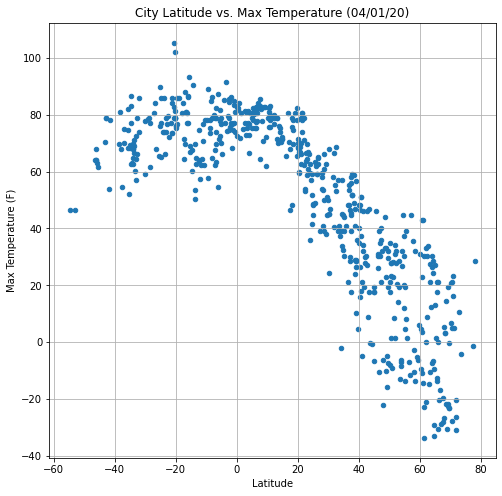

In [196]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Max Temp", grid=True, figsize=(8,8), 
               title="City Latitude vs. Max Temperature (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Max Temperature (F)')
plot.xaxis.get_label().set_visible(True)
plt.show()

Latitude vs. Humidity Plot

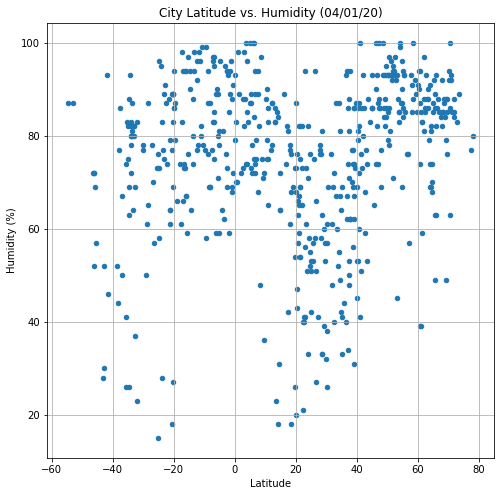

In [197]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Humidity", grid=True, figsize=(8,8), 
               title="City Latitude vs. Humidity (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Humidity (%)')
plot.xaxis.get_label().set_visible(True)
plt.show()

Latitude vs. Cloudiness Plot

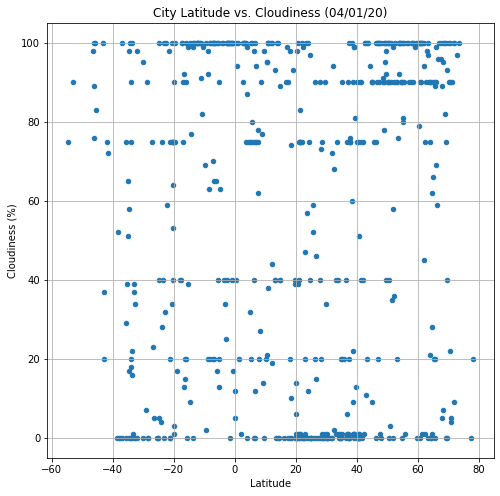

In [198]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Cloudiness", grid=True, figsize=(8,8), 
               title="City Latitude vs. Cloudiness (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Cloudiness (%)')
plot.xaxis.get_label().set_visible(True)
plt.show()

Latitude vs. Wind Speed Plot

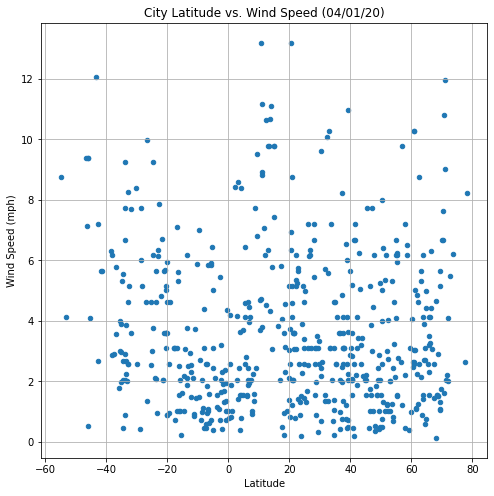

In [199]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Wind Speed", grid=True, figsize=(8,8), 
               title="City Latitude vs. Wind Speed (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Wind Speed (mph)')
plot.xaxis.get_label().set_visible(True)
plt.show()

Linear Regression

In [200]:
#Create dataframes for northern and southern hemisphere
nh = cities_df.loc[cities_df['Lat'] > 0]
sh = cities_df.loc[cities_df['Lat'] < 0]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.38x + 90.29
 The r-value is: -0.8772676321134517
The r-squared is: 0.7695984983539425


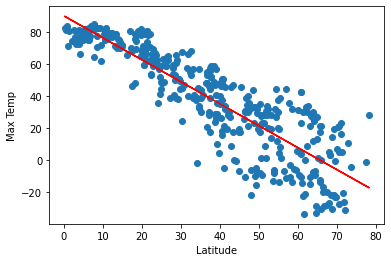

In [201]:
x_values = nh['Lat']
y_values = nh['Max Temp']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.23x + 78.46
 The r-value is: 0.30484245879633476
The r-squared is: 0.09292892468499506


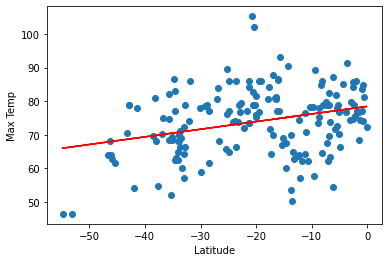

In [202]:
x_values = sh['Lat']
y_values = sh['Max Temp']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.23x + 65.61
 The r-value is: 0.26561448539640725
The r-squared is: 0.07055105485239824


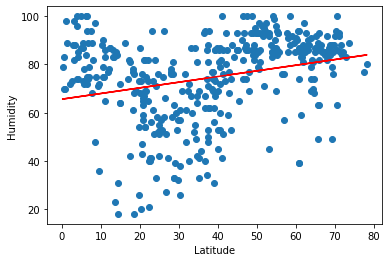

In [203]:
x_values = nh['Lat']
y_values = nh['Humidity']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.47x + 85.11
 The r-value is: 0.35000411402206705
The r-squared is: 0.12250287983237211


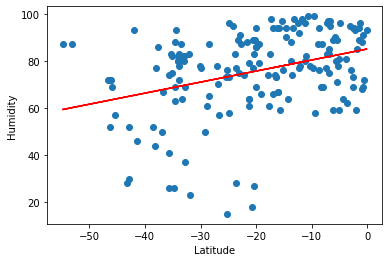

In [204]:
x_values = sh['Lat']
y_values = sh['Humidity']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.34x + 41.59
 The r-value is: 0.16564500320298992
The r-squared is: 0.027438267086118538


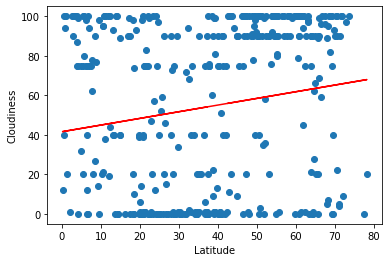

In [205]:
x_values = nh['Lat']
y_values = nh['Cloudiness']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.65x + 71.01
 The r-value is: 0.2168864968835946
The r-squared is: 0.04703975253043749


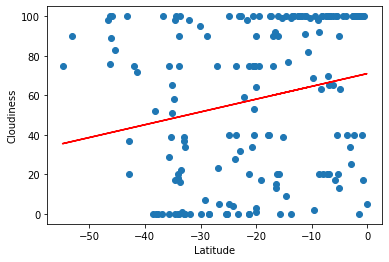

In [206]:
x_values = sh['Lat']
y_values = sh['Cloudiness']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x + 4.02
 The r-value is: -0.07969560792123116
The r-squared is: 0.006351389921934603


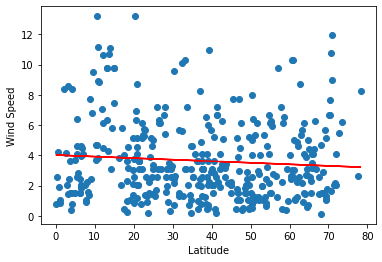

In [207]:
x_values = nh['Lat']
y_values = nh['Wind Speed']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.09x + 1.74
 The r-value is: -0.472398256785915
The r-squared is: 0.2231601130143713


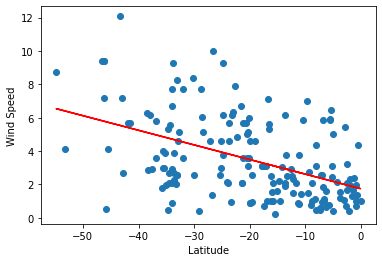

In [208]:
x_values = sh['Lat']
y_values = sh['Wind Speed']
tvl_slope, tvl_int, tvl_r, tvl_p, tvl_std_err = linregress(x_values,y_values)
tvl_fit = tvl_slope * x_values + tvl_int
line_eq = "y = " + str(round(tvl_slope,2)) + "x + " + str(round(tvl_int,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,tvl_fit, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(line_eq)
print(f" The r-value is: {tvl_r}")
print(f"The r-squared is: {tvl_r**2}")